In [213]:
import pandas as pd
from datetime import datetime
%matplotlib inline

In [220]:
df = pd.read_csv('results\pnl_series\ETHUSDT_MA_STRATEGY_15m_2020_01_0100_00_00.csv', squeeze = True , names = ['timestamp', 'pnl'])
df = df.dropna()
df.head()
f= [e for e in df.pnl]
l = [pd.to_datetime(e) for e in df.timestamp]

returns = pd.Series(index=l, data= f)
returns.index = returns.index.normalize()

candle_data_data.head()

FileNotFoundError: [Errno 2] File results\pnl_series\ETHUSDT_MA_STRATEGY_15m_2020_01_0100_00_00.csv does not exist: 'results\\pnl_series\\ETHUSDT_MA_STRATEGY_15m_2020_01_0100_00_00.csv'

In [221]:
candle_data = pd.read_csv('results\candles\OHLC_ETHUSDT_MA_STRATEGY_15m_2020_03_0100_00_00.csv')
candle_data.index = pd.to_datetime(candle_data['timestamp'])
del candle_data['Unnamed: 0']
del candle_data['timestamp']
candle_data.head()

,open,high,low,close,volume,sell,buy
timestamp,,,,,,,
2020-02-29 18:00:00,217.29,220.57,216.94,219.56,13185.17233,NaN,NaN
2020-02-29 18:15:00,219.55,221.27,219.42,221.02,8918.71246,NaN,NaN
2020-02-29 18:30:00,220.92,220.94,218.43,218.90,5650.54970,NaN,NaN
2020-02-29 18:45:00,218.90,219.43,217.82,218.36,7388.75375,NaN,NaN
2020-02-29 19:00:00,218.39,218.54,216.10,216.51,12444.76380,NaN,NaN


In [230]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Ohlc(x=candle_data.index,
                     open=candle_data['open'],
                     high=candle_data['high'],
                     low=candle_data['low'],
                     close=candle_data['close'],
                     name="Candles"))

fig.add_trace(go.Scatter(x=candle_data.index, y=candle_data['buy'], mode='markers', line=dict(color='royalblue', width=4), name = "BUY"))
fig.add_trace(go.Scatter(x=candle_data.index, y=candle_data['sell'], mode='markers', line=dict(color='yellow', width=4), name="SELL"))

fig.update_layout(autosize=True)
fig.show()

Start date,2020-01-01
End date,2020-04-09
Total months,4
,Backtest
Annual return,nan%
Cumulative returns,-343.3%
Annual volatility,3071.2%
Sharpe ratio,1.51
Calmar ratio,NaN
Stability,NaN
Max drawdown,-1791.2%


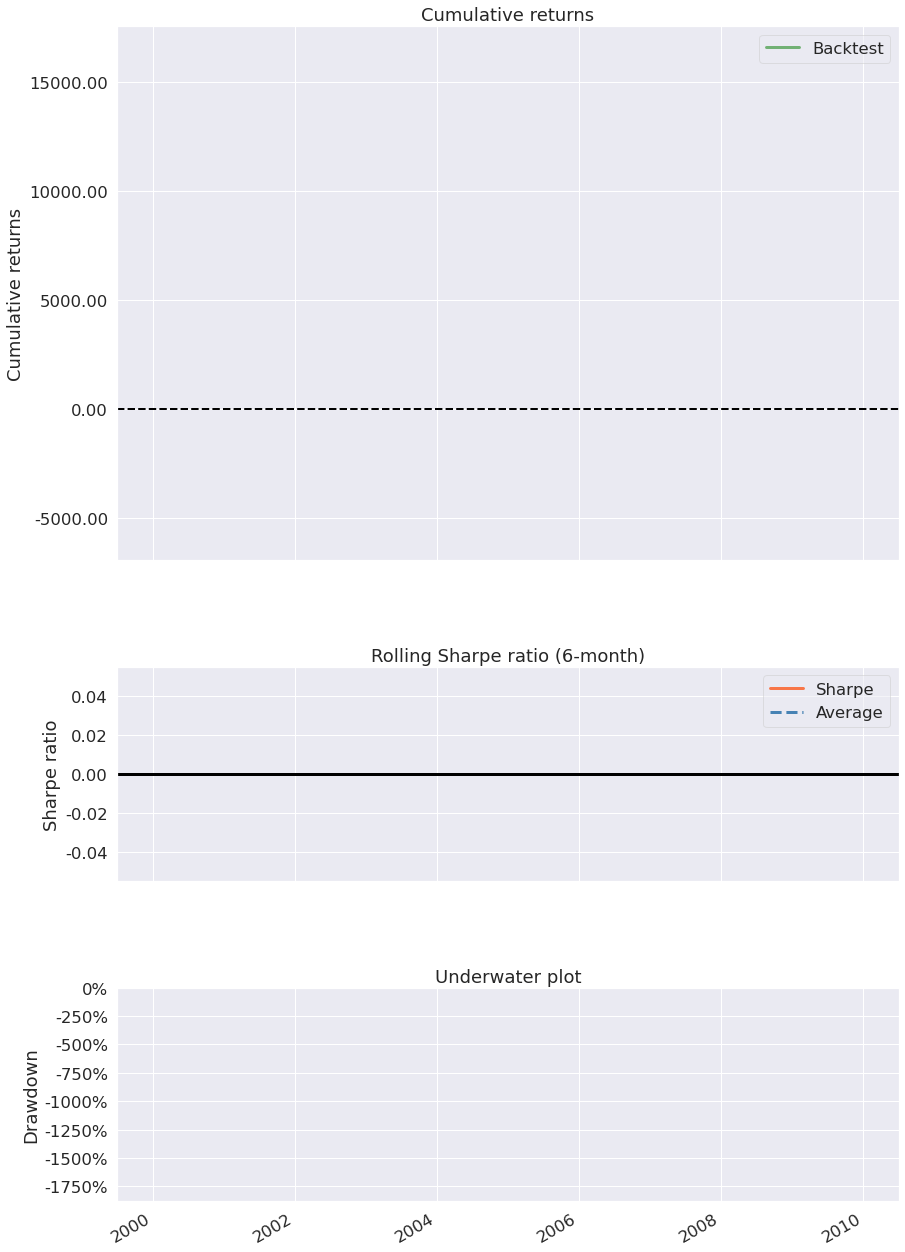

In [163]:
import pyfolio as pf
pf.create_simple_tear_sheet(returns)

